In [ ]:
!pip install numpy
!pip install pandas
!pip install sklearn

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
from tensorflow.keras.datasets import imdb

In [2]:
class myBernoulliNB():
     
    def __init__(self, skip, attr):
        self.nSkip = skip
        self.mAttr = attr
        self.wordProb = np.array(np.zeros(shape=(attr, 4)))
        
    def fit(self, X, y):
        self.totalExamples = len(y)
        self.totalPositive = sum(y)
        self.totalNegative = self.totalExamples - self.totalPositive
        self.probPositive = self.totalPositive / self.totalExamples
        self.probNegative = 1 - self.probPositive
        for index, review in enumerate(X):
            for word in review:
                if word > self.nSkip and word <= self.nSkip + self.mAttr:
                    if y[index] > 0.5:
                        self.wordProb[word - self.nSkip - 1][0] += 1
                    else:
                        self.wordProb[word - self.nSkip - 1][1] += 1
        
        for i in range(self.mAttr):
            self.wordProb[i][0] += 1
            self.wordProb[i][1] += 1 
            
        for i in range(self.mAttr):
            self.wordProb[i][2] = self.wordProb[i][0] / (self.totalPositive + 2)
            self.wordProb[i][3] = self.wordProb[i][1] / (self.totalNegative + 2)
    
    
    def predict(self, X):
        y_pred = np.array(np.zeros(shape=(len(X), 1)))
        for index, review in enumerate(X):
            productPos = 0
            productNeg = 0
            for word in review:
                if word > self.nSkip and word <= self.nSkip + self.mAttr:
                    productPos += math.log(1 + self.wordProb[word - self.nSkip - 1][2])
                    productNeg += math.log(1 + self.wordProb[word - self.nSkip - 1][3])
            predPos = self.probPositive * productPos
            predNeg = self.probNegative * productNeg
            if predPos > predNeg:
                y_pred[index] = 1
            else:
                y_pred[index] = 0
        return y_pred

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25)

In [9]:
############ FINDING THE BEST HYPER-PARAMETERS (WORDS TO SKIP, ATTRIBUTES TO KEEP) ############
best_skipped = 0
best_attr = 0
max_acc = -1
for nSkip in range(100, 400, 50):
    for nAttr in range(200, 1050, 50):
        clf_h = myBernoulliNB(nSkip, nAttr)
        clf_h.fit(X_train, y_train)
        y_pred = clf_h.predict(X_dev)
        acc = accuracy_score(y_dev, y_pred)
        if acc > max_acc:
            max_acc = acc
            best_skipped = nSkip
            best_attr = nAttr
            
print("Max accuracy: ", max_acc)
print("Best amount of skipped words: ", best_skipped)
print("Best amount of kept attributes:: ", best_attr)

Max accuracy:  0.81632
Best amount of skipped words:  200
Best amount of kept attributes::  950


In [10]:
############ FINDING THE LEARNING CURVES ############
rows = len(X_train)
accuraciesTrain = []
accuraciesDev = []
for i in range(1, 11):
    percentage = int((i / 10) * rows)
    
    clf_c = myBernoulliNB(best_skipped, best_attr)
    clf_c.fit(X_train[:percentage], y_train[:percentage])
    
    y_pred_Train = clf_c.predict(X_train)
    accT = accuracy_score(y_train, y_pred_Train)
    accuraciesTrain.append(accT)
    
    y_pred_Dev = clf_c.predict(X_dev)
    accD = accuracy_score(y_dev, y_pred_Dev)
    accuraciesDev.append(accD)

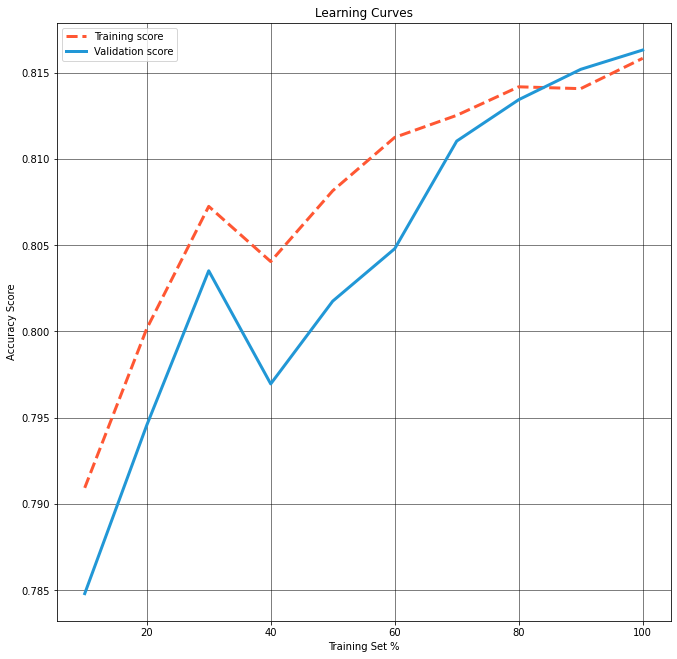

In [11]:
plt.subplots(1, figsize=(11, 11))
plt.plot(range(10, 110, 10), accuraciesTrain, '--', color="#FF5733",  label="Training score", linewidth=3)
plt.plot(range(10, 110, 10), accuraciesDev, color="#2197D6", label="Validation score", linewidth=3)
plt.grid(color='#000000', linestyle='-', linewidth=0.5)
plt.title("Learning Curves")
plt.xlabel("Training Set %"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.show()

In [7]:
############ EVALUATING THE BEST MODEL ############
clf = myBernoulliNB(best_skipped, best_attr)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     12500
           1       0.83      0.78      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000

Accuracy:  0.81084


In [ ]:
############ COMPARING WITH THE SKLEARN MODEL ############
from sklearn.naive_bayes import BernoulliNB
skc = BernoulliNB()
skc.fit(X_train, y_train)
sk_pred = skc.predict(X_test)
print(confusion_matrix(y_test, sk_pred))
print(classification_report(y_test, sk_pred))
print('Accuracy: ', accuracy_score(y_test, sk_pred))